# Machine Learning Project: Stroke Prediction

**Name:** Okba Kharef


## 1.Context

- According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

**Attribute Information**
1. **id**: unique identifier

2. **gender**: "Male", "Female" or "Other"

3. **age**: age of the patient

4. **hypertension**: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5. **heart_disease**: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6. **ever_married**: "No" or "Yes"

7. **work_type**: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8. **Residence_type**: "Rural" or "Urban"

9. **avg_glucose_level**: average glucose level in blood

10. **bmi**: body mass index

11. **smoking_status**: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12. **stroke**: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

Reference: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset 


## 2. Project Objective

The goal of this project is to analyze a dataset of patient attributes to predict the likelihood of a stroke. We will perform a comprehensive analysis which includes:

1.  **Exploratory Data Analysis (EDA):** To understand the data's structure, features, and identify potential challenges .
2.  **Data Preprocessing:** To clean and prepare the data for machine learning models.
3.  **Model Training:** To build and train several classification algorithms, including both basic models and more complex ensemble methods.
4.  **Model Evaluation & Comparison:** To evaluate the models using appropriate metrics for an imbalanced dataset and to compare their performance to identify the most effective algorithm.

## 2. Setup: Importing Libraries

This first code block is for importing all the necessary Python libraries for the project.

In [1042]:
# For data manipulation and analysis
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import missingno as msno


from pywaffle import Waffle



# For splitting data and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Optional: for scaling numerical features

# For handling class imbalance
from imblearn.over_sampling import SMOTE

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, GridSearchCV
from scipy.stats import wilcoxon

# For evaluating model performance
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, accuracy_score, precision_score, recall_score,mean_squared_error, mean_absolute_error, make_scorer, precision_score, recall_score, ConfusionMatrixDisplay




# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

## 3. Loading the Data

Here, we load the dataset from the CSV file into a pandas DataFrame.

In [1043]:
# Load the dataset
#dataset URL= https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
df = pd.read_csv('Data/healthcare-dataset-stroke-data.csv')


## 4. Exploratory Data Analysis (EDA)

In this section, we explore the data to understand its properties and find any issues that need to be addressed.

### 4.1. Initial Data Inspection

Let's look at the first few rows, the data types, and a statistical summary.

In [1044]:
# Display the first 5 rows of the dataframe
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [1045]:
print (f' We have {df.shape[0]} instances with the {df.shape[1]-1} features and 1 output variable')

 We have 5110 instances with the 11 features and 1 output variable


In [1046]:
# Get a concise summary of the dataframe, including data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


- In our dataset, we have both numerical and categorical variables.
- It is essential to see whether columns are correctly inferred.
- The most important one to look for is our target variable 'stroke'
- 'Stroke' is detected as an integer, not as an object.
- Target variable is coded as 1 for positive cases (has a stroke) and 0 for negative cases (does not have a stroke)
- Both 'Hypertension' and 'heart disease" are detected as an integer, not as an object. 
- Just remember from the data definition part, they are coded as 1 for the positive cases(has hypertension/heart disease) 
- And 0 for the negative cases (does not have hypertension/heart disease)
- We don't need to change them, but it is good to see and be aware of it.
- In addition to them, we have 3 categorical variables, which we have to encode as numerical.

<a id="3"></a>
<font color="lightseagreen" size=+1.5><b>What Problem We Have?</b></font>
- We have binary classification problem.
- We make prection on the target variable **STROKE**
- And we will build a model to get best prediction on the stroke variable.

<a id="4"></a>
<font color="lightseagreen" size=+1.5><b>Target Variable</b></font>


- One of the first steps of exploratory data analysis should always be to look at what the values of y look like.

In [1047]:
y = df['stroke']
print(f'Percentage of patient had a stroke: % {round(y.value_counts(normalize=True)[1]*100,2)} --> ({y.value_counts()[1]} patient)\nPercentage of patient did not have a stroke: % {round(y.value_counts(normalize=True)[0]*100,2)} --> ({y.value_counts()[0]} patient)')

Percentage of patient had a stroke: % 4.87 --> (249 patient)
Percentage of patient did not have a stroke: % 95.13 --> (4861 patient)


- Almost %95 of the instances of our target variable is 'No stroke'
-  4861 patient does not have a stroke
- %5  of the instances of our target variable is 'Stroke'
- 249 patient have a stroke.

- We have imbalanced data.


In [1048]:
fig = px.histogram(df, x="stroke", title='Stroke', width=400, height=400)
fig.show()

- Our  stroke dataset is an example of a so-called imbalanced dataset.
- There are 19 times more people who didn’t have stroke in our data than who had, and we say that the non-stroke class dominates the stroke class.
- We can clearly see that: the stroke rate in our data is 0.048
- Which is a strong indicator of class imbalance

<a id="5"></a>
<font color="lightseagreen" size=+1.5><b>Imbalance Data</b></font>

- Instances across classes are imbalanced, like in our dataset, we have imbalance data.

- The problem is, most of the machine learning algorithm do not work well with the imbalanced data.

- Some of the metrics (like accuracy) give us misleading results.

- Most of the time in classification problems our interest is to get better predict on the minority class.

- In our example: People had a stroke is minority class.

- Otherwise our machine learning algorithm falsely predicts majority class.

- In our example: No stroke is majority class.

There are a few different ways to handle imbalanced datasets,
such as *undersampling* the majority class, or *oversampling* the minority one.
We could also use more advanced algorithms, such as *SMOTE*, to generate synthetic samples from the minority class.

<a id="6"></a>
<font color="lightseagreen" size=+1.5><b>Decide the Metric</b></font>

- This is the first step when approaching a machine learning problem: decide the metric!

- The choice of the wrong metric can mean choosing the wrong algorithm.

- Rather than the basic *accuracy* metric, we will use the *F1 score* metric, which is the harmonic mean of *precision* and *recall*:

$$
\text{F1 Score} = 2 * \frac{precision * sensitivity}{precision + sensitivity}
$$

In [1049]:
# Get descriptive statistics for numerical columns
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [1050]:
# This helps check for any rare categories.

categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"Value counts for column: {col}")
    print(df[col].value_counts())
    print("-" * 30)

Value counts for column: gender
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
------------------------------
Value counts for column: ever_married
ever_married
Yes    3353
No     1757
Name: count, dtype: int64
------------------------------
Value counts for column: work_type
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
------------------------------
Value counts for column: Residence_type
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
------------------------------
Value counts for column: smoking_status
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64
------------------------------


### 4.2. Handling Missing Values

-In our initial data inspection with **.info()**, we identified that the bmi column is the only one with missing values. Before we can train our models, we must address these missing entries through imputation, which means filling in the blanks with a substituted value.

In [1051]:
df.isnull().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [1052]:
missing_bmi_count = df['bmi'].isnull().sum()
total_rows = len(df)
missing_percentage = (missing_bmi_count / total_rows) * 100

print(f"Number of missing BMI values: {missing_bmi_count}")
print(f"Percentage of missing BMI values: {missing_percentage:.2f}%")

Number of missing BMI values: 201
Percentage of missing BMI values: 3.93%


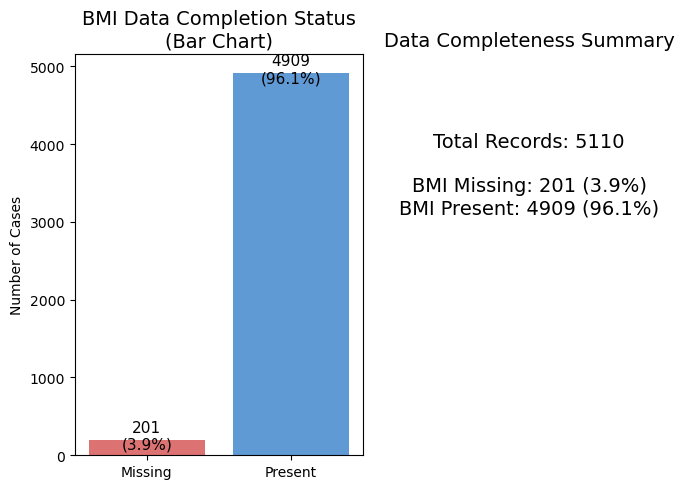

Detailed Summary:
Total records: 5110
Missing BMI: 201 (3.9%)
Available BMI: 4909 (96.1%)


In [1053]:
# Visualize missing values in the dataset
# Calculate missing values
total = len(df)
missing = df['bmi'].isna().sum()
present = total - missing
missing_pct = round(missing/total * 100, 1)

# Create visualization
plt.figure(figsize=(7, 5))

# Bar plot
plt.subplot(121)
ax = sns.barplot(x=['Missing', 'Present'], 
                 y=[missing, present], 
                 palette=["#EE6060", "#4c9ae9"])
plt.title('BMI Data Completion Status\n(Bar Chart)', fontsize=14)
plt.ylabel('Number of Cases')

# Add annotations
for i, v in enumerate([missing, present]):
    pct = f'{missing_pct}%' if i == 0 else f'{100-missing_pct}%'
    ax.text(i, v + 50, f'{v}\n({pct})', 
            ha='center', 
            va='center',
            fontsize=11)

# Text-based visualization
plt.subplot(122)
plt.text(0.5, 0.7, 
         f"Total Records: {total}\n\nBMI Missing: {missing} ({missing_pct}%)\nBMI Present: {present} ({100-missing_pct}%)",
         fontsize=14,
         ha='center',
         va='center')
plt.axis('off')
plt.title('Data Completeness Summary', fontsize=14)

plt.tight_layout()
plt.show()

# Print detailed summary
print(f"Detailed Summary:")
print(f"Total records: {total}")
print(f"Missing BMI: {missing} ({missing_pct}%)")
print(f"Available BMI: {present} ({100-missing_pct}%)")

<a id="3"></a>
<font color="lightseagreen" size=+1.5><b>4.2.1.Choosing the Right Imputation Strategy: Mean vs. Median</b></font>

With approximately **4% of BMI** values missing, simply deleting these rows would cause a loss of valuable data. A better approach is to impute them. The two most common strategies are using the mean or the median value of the column.
- **Mean**: The average value. It is simple but **can be easily influenced by extremely high or low values (outliers)**.
- **Median**: The middle value of the sorted data. It is known to be **robust to outliers**.

To make an informed decision, we must visualize the distribution of the bmi column. This will show us if the data is symmetric or if it is "skewed" by the presence of outliers.

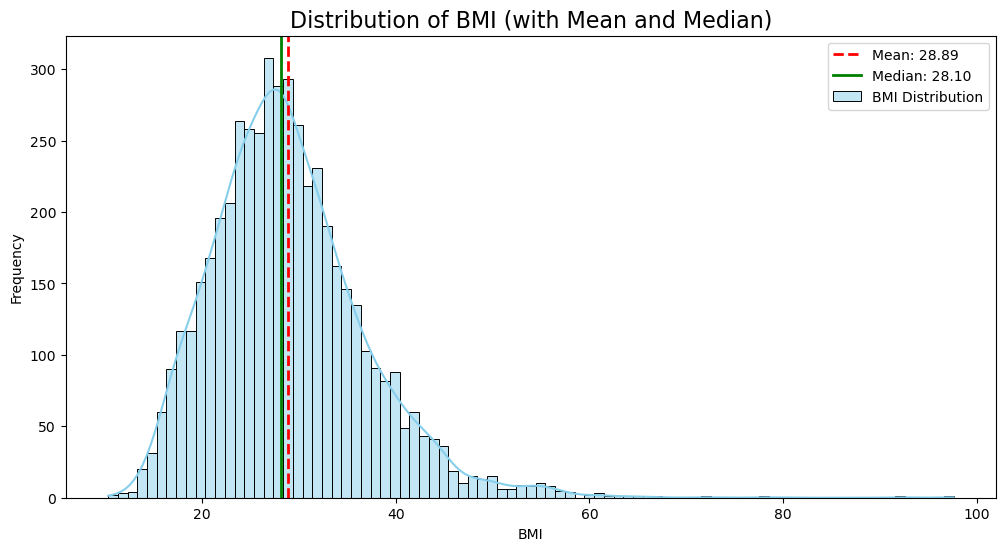

In [1054]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 6))
plt.title('Distribution of BMI (with Mean and Median)', fontsize=16)
plt.xlabel('BMI')
plt.ylabel('Frequency')

# Plot a histogram of the BMI data that is not null
sns.histplot(df['bmi'].dropna(), kde=True, color='skyblue', binwidth=1, label='BMI Distribution')

# Add vertical lines for the mean and median to compare them visually
plt.axvline(df['bmi'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {df['bmi'].mean():.2f}")
plt.axvline(df['bmi'].median(), color='green', linestyle='-', linewidth=2, label=f"Median: {df['bmi'].median():.2f}")

plt.legend()
plt.show()

<a id="3"></a>
<font color="lightseagreen" size=+1.5><b>4.2.2. Analysis of the Distribution and Final Decision</b></font>

The visualization provides critical insights for our decision:

1. **Right-Skewed Distribution**: The graph is not symmetrical. There is a "tail" extending to the right, which indicates the presence of a minority of patients with very high BMI values **(outliers).**
2. **Mean vs. Median Position**: While the two values are numerically close (Mean: 28.89, Median: 28.10), their positions are telling. The Mean (red line) is positioned slightly to the right of the Median (green line).

**Conclusion**: This slight difference is visual proof that the outliers in the tail are pulling the Mean towards them. Even though the effect is small, it confirms the Mean is being influenced by extreme values. The Median, located at the center of the main population hump, is unaffected. For this reason, **the Median is the more statistically robust and honest representation of a 'typical' patient.** Therefore, it is the best choice for imputation.

We will now fill the missing BMI values using the calculated median.

In [1055]:
# Calculate the median value of the 'bmi' column
bmi_median = df['bmi'].median()
print(f"The calculated median BMI to be used for imputation is: {bmi_median:.2f}")

# Impute the missing values in 'bmi' with the median.
# The inplace=True argument modifies the DataFrame directly, so we don't need to re-assign it.
df['bmi'].fillna(bmi_median, inplace=True)

The calculated median BMI to be used for imputation is: 28.10


<a id="3"></a>
<font color="lightseagreen" size=+1.5><b>4.2.3.Verification</b></font>

In [1056]:
# Check the number of missing values in the 'bmi' column one last time
final_missing_count = df['bmi'].isnull().sum()

print(f"Number of missing BMI values after imputation: {final_missing_count}")

if final_missing_count == 0:
    print("Verification successful: The 'bmi' column has no missing values.")
else:
    print("Warning: Missing values still exist in the 'bmi' column.")

Number of missing BMI values after imputation: 0
Verification successful: The 'bmi' column has no missing values.


### 4.3. Data Visualization

Next, we want to explore the data.

fundamentally we need to understand the relationships within the data.
- Which features seem to be important for predicting a stroke?
- What do the characteristics of patients who have strokes look like?
- Does age makes one more likely to suffer a stroke? What about gender? Or BMI?

These are all questions that can be explored and answered with some data visulization.

First, let's look at the numeric/continuous variable distribtion

#### Numerical and Categorical Features

##### <a id="3"></a><font color="lightseagreen" size=+1.5><b>Features Identification</b></font>

In [1057]:
# Create lists to hold the names of columns of different data types
numerical_features = []
categorical_features = []

# Loop through all the columns in the DataFrame
for col in df.columns:
    # Check if the column is of a numeric data type and has more than 2 unique values
    # (We consider columns with only 2 unique values, like 'hypertension', as categorical)
    if pd.api.types.is_numeric_dtype(df[col]) and df[col].nunique() > 2:
        numerical_features.append(col)
    # All other columns are treated as categorical
    else:
        categorical_features.append(col)

# Print the lists to see the results
print("--- Column Types ---")
print("\nNumerical Features:")
for feature in numerical_features:
    print(f"  - {feature}")
print("\nCategorical Features:")
for feature in categorical_features:
    print(f"  - {feature}")

--- Column Types ---

Numerical Features:
  - id
  - age
  - avg_glucose_level
  - bmi

Categorical Features:
  - gender
  - hypertension
  - heart_disease
  - ever_married
  - work_type
  - Residence_type
  - smoking_status
  - stroke


For feature extraction, binning was applied for all the continous values, binning values are taken from follow articles.


* [body mass index binning](https://www.medicalnewstoday.com/articles/323446#body-mass-index)
* [Age binning](https://kidspicturedictionary.com/english-through-pictures/people-english-through-pictures/age-physical-description/)
* [average glucose binning](https://agamatrix.com/blog/normal-blood-sugar-level-chart/)

In [1058]:
df['bmi_cat'] = pd.cut(df['bmi'], bins = [0, 19, 25,30,10000], labels = ['Underweight', 'Ideal', 'Overweight', 'Obesity'])
df['age_cat'] = pd.cut(df['age'], bins = [0,13,18, 45,60,200], labels = ['Children', 'Teens', 'Adults','Mid Adults','Elderly'])
df['glucose_cat'] = pd.cut(df['avg_glucose_level'], bins = [0,90,160,230,500], labels = ['Low', 'Normal', 'High', 'Very High'])

##### <a id="3"></a><font color="lightseagreen" size=+1.5><b>analysis of continuous features</b></font>

So we've gained some understanding on the distributiona of our numeric variables, but we can add more information to this plot.

Let's see how the distribution of our numeric variables is different for those that have strokes, and those that do not.

This could be important for modelling later on

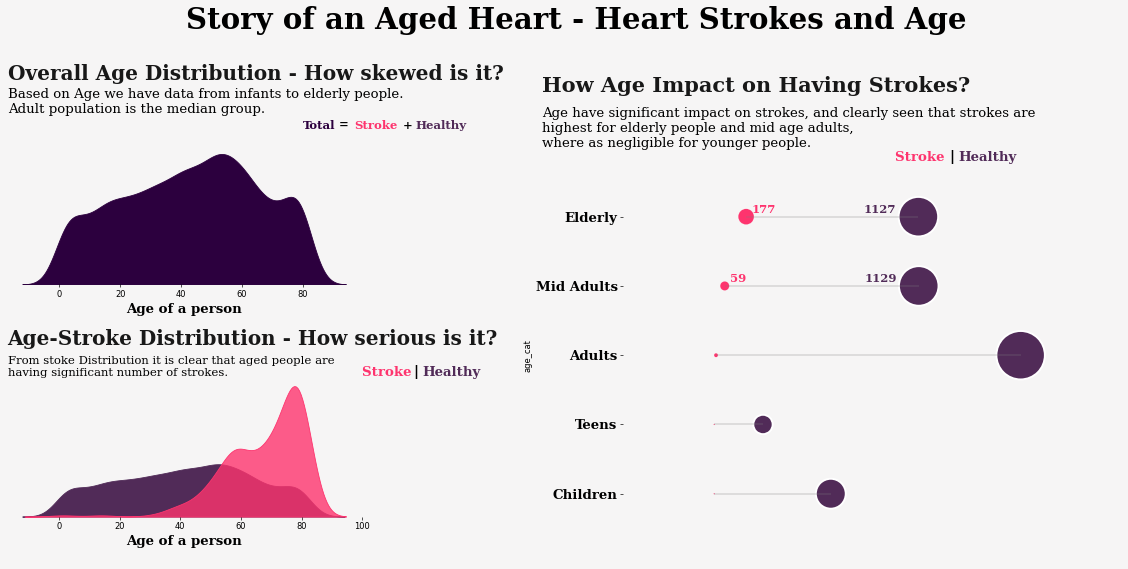

In [1059]:
fig = plt.figure(figsize = (24,10), dpi = 60)

gs = fig.add_gridspec(10,24)
gs.update(wspace = 1, hspace = 0.05)


ax2 = fig.add_subplot(gs[1:4,0:8]) #distribution plot
ax3 = fig.add_subplot(gs[6:9, 0:8]) #hue distribution plot
ax1 = fig.add_subplot(gs[1:10,13:]) #dumbbell plot

# axes list
axes = [ ax1,ax2, ax3]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f6f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#f6f5f5')
        
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(True)

# dumbbell plot of stoke and healthy people

stroke_age = df[df['stroke'] == 1].age_cat.value_counts()
healthy_age = df[df['stroke'] == 0].age_cat.value_counts()

ax1.hlines(y = ['Children', 'Teens', 'Adults', 'Mid Adults', 'Elderly'], xmin = [644,270,1691,1129,1127], 
          xmax = [1,1,11,59,177], color = 'grey',**{'linewidth':0.5})


sns.scatterplot(y = stroke_age.index, x = stroke_age.values, s = stroke_age.values*2, color = '#fe346e', ax= ax1, alpha = 1)
sns.scatterplot(y = healthy_age.index, x = healthy_age.values, s = healthy_age.values*2, color = '#512b58', ax= ax1, alpha = 1)

ax1.axes.get_xaxis().set_visible(False)
ax1.set_xlim(xmin = -500, xmax = 2250)
ax1.set_ylim(ymin = -1,ymax = 5)

ax1.set_yticklabels( labels = ['Children', 'Teens', 'Adults', 'Mid Adults', 'Elderly'],fontdict = {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})

ax1.text(-950,5.8, 'How Age Impact on Having Strokes?' ,{'font': 'Serif', 'fontsize': 25,'weight':'bold', 'color':'black'},alpha = 0.9)
ax1.text(1000,4.8, 'Stroke ', {'font': 'Serif','weight':'bold','fontsize': 16,'weight':'bold','style':'normal', 'color':'#fe346e'})
ax1.text(1300,4.8, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax1.text(1350,4.8, 'Healthy', {'font': 'Serif','weight':'bold', 'fontsize': 16,'style':'normal', 'weight':'bold','color':'#512b58'})
ax1.text(-950,5., 'Age have significant impact on strokes, and clearly seen that strokes are \nhighest for elderly people and mid age adults, \nwhere as negligible for younger people.', 
        {'font':'Serif', 'size':'16','color': 'black'})

ax1.text(stroke_age.values[0] + 30,4.05, stroke_age.values[0], {'font':'Serif', 'fontsize':14, 'weight':'bold', 'color':'#fe346e'})
ax1.text(healthy_age.values[2] - 300,4.05, healthy_age.values[2], {'font':'Serif', 'fontsize':14, 'weight':'bold', 'color':'#512b58'})

ax1.text(stroke_age.values[1] + 30,3.05, stroke_age.values[1], {'font':'Serif', 'fontsize':14, 'weight':'bold', 'color':'#fe346e'})
ax1.text(healthy_age.values[1] - 300,3.05, healthy_age.values[1], {'font':'Serif', 'fontsize':14, 'weight':'bold', 'color':'#512b58'})




# distribution plots ---- only single variable

sns.kdeplot(data = df, x = 'age', ax = ax2, shade = True, color = '#2c003e', alpha = 1, )
ax2.set_xlabel('Age of a person', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
ax2.text(-17,0.025,'Overall Age Distribution - How skewed is it?', {'font':'Serif', 'color': 'black','weight':'bold','size':24}, alpha = 0.9)
ax2.text(-17,0.021, 'Based on Age we have data from infants to elderly people.\nAdult population is the median group.', 
        {'font':'Serif', 'size':'16','color': 'black'})
ax2.text(80,0.019, 'Total',{'font':'Serif', 'size':'14','color': '#2c003e','weight':'bold'})
ax2.text(92,0.019, '=',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(97,0.019, 'Stroke',{'font':'Serif', 'size':'14','color': '#fe346e','weight':'bold'})
ax2.text(113,0.019, '+',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(117,0.019, 'Healthy',{'font':'Serif', 'size':'14','color': '#512b58','weight':'bold'})



# distribution plots with hue of strokes


sns.kdeplot(data = df[df['stroke'] == 0], x = 'age',ax = ax3, shade = True,  alpha = 1, color = '#512b58' )
sns.kdeplot(data = df[df['stroke'] == 1], x = 'age',ax = ax3, shade = True,  alpha = 0.8, color = '#fe346e')

ax3.set_xlabel('Age of a person', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

ax3.text(-17,0.0525,'Age-Stroke Distribution - How serious is it?', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24}, alpha= 0.9)
ax3.text(-17,0.043,'From stoke Distribution it is clear that aged people are \nhaving significant number of strokes.', {'font':'Serif', 'color': 'black', 'size':14})
ax3.text(100,0.043, 'Stroke ', {'font': 'Serif','weight':'bold','fontsize': 16,'weight':'bold','style':'normal', 'color':'#fe346e'})
ax3.text(117,0.043, '|', {'color':'black' , 'fontsize':'16', 'weight': 'bold'})
ax3.text(120,0.043, 'Healthy', {'font': 'Serif','weight':'bold', 'fontsize': 16,'style':'normal', 'weight':'bold','color':'#512b58'})

fig.text(0.25,1,'Story of an Aged Heart - Heart Strokes and Age',{'font':'Serif', 'weight':'bold','color': 'black', 'size':35})
fig.show()


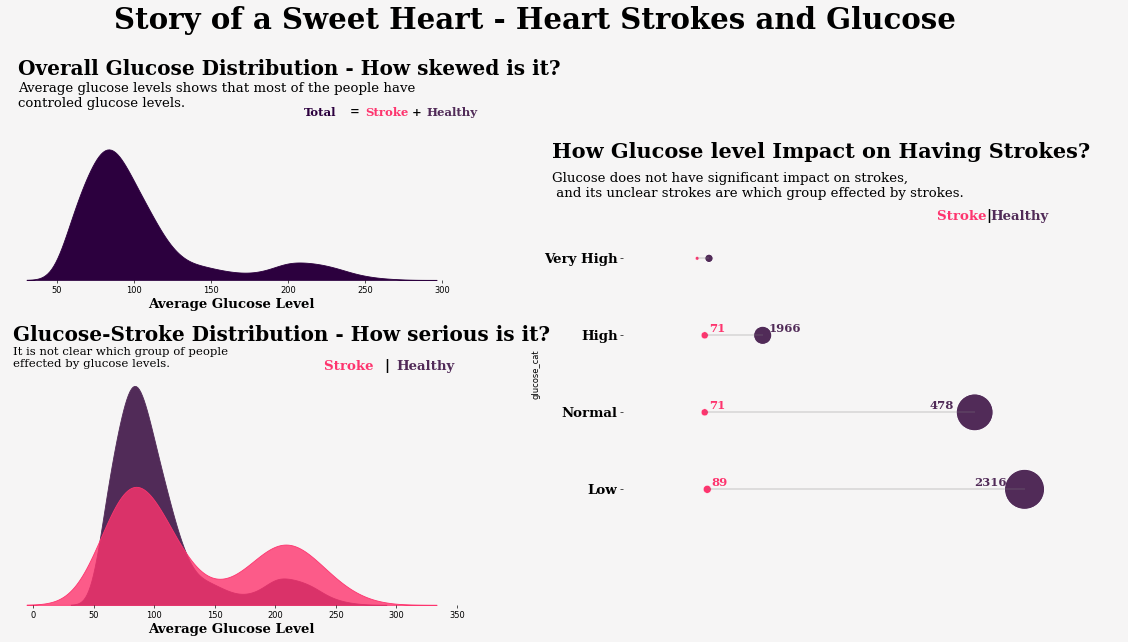

In [1060]:
# sugar distribution plots


fig = plt.figure(figsize = (24,10), dpi = 60)

gs = fig.add_gridspec(10,24)
gs.update(wspace = 1, hspace = 0.05)


ax2 = fig.add_subplot(gs[0:3,0:10]) #distribution plot
ax3 = fig.add_subplot(gs[5:10, 0:10]) #hue distribution plot
ax1 = fig.add_subplot(gs[0:,13:]) #dumbbell plot

# axes list
axes = [ ax1,ax2, ax3]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f6f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#f6f5f5')
        
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(True)

# dumbbell plot of stoke and healthy people

stroke_glu = df[df['stroke'] == 1].glucose_cat.value_counts()
healthy_glu = df[df['stroke'] == 0].glucose_cat.value_counts()

ax1.hlines(y = ['Low', 'Normal', 'High', 'Very High'], xmin = [2316,1966,478,101], 
          xmax = [89,71,71,18], color = 'grey',**{'linewidth':0.5})


sns.scatterplot(y = stroke_glu.index, x = stroke_glu.values, s = stroke_glu.values, color = '#fe346e', ax= ax1, alpha = 1)
sns.scatterplot(y = healthy_glu.index, x = healthy_glu.values, s = healthy_glu.values, color = '#512b58', ax= ax1, alpha = 1)

ax1.axes.get_xaxis().set_visible(False)
ax1.set_xlim(xmin = -500, xmax = 3000)
ax1.set_ylim(ymin = -1.5,ymax = 4.5)

ax1.set_yticklabels( labels = ['Low', 'Normal', 'High', 'Very High'],fontdict = {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})

ax1.text(-1000,4.3, 'How Glucose level Impact on Having Strokes?' ,{'font': 'Serif', 'fontsize': 25,'weight':'bold', 'color':'black'})
ax1.text(1700,3.5, 'Stroke ', {'font': 'Serif','weight':'bold', 'fontsize': 16,'weight':'bold','style':'normal', 'color':'#fe346e'})
ax1.text(2050,3.5, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax1.text(2075,3.5, 'Healthy', {'font': 'Serif','weight':'bold', 'fontsize': 16,'style':'normal', 'weight':'bold','color':'#512b58'})
ax1.text(-1000,3.8, 'Glucose does not have significant impact on strokes,\n and its unclear strokes are which group effected by strokes.',
        {'font':'Serif', 'fontsize':'16','color': 'black'})

ax1.text(stroke_glu.values[0] + 30,0.05, stroke_glu.values[0], {'font':'Serif', 'fontsize':14, 'weight':'bold', 'color':'#fe346e'})
ax1.text(healthy_glu.values[0] + -355,0.05, healthy_glu.values[0], {'font':'Serif', 'fontsize':14, 'weight':'bold', 'color':'#512b58'})

ax1.text(stroke_glu.values[2] + 30,1.05, stroke_glu.values[2], {'font':'Serif', 'fontsize':14, 'weight':'bold', 'color':'#fe346e'})
ax1.text(healthy_glu.values[2] + 1170,1.05, healthy_glu.values[2], {'font':'Serif', 'fontsize':14, 'weight':'bold', 'color':'#512b58'})

ax1.text(stroke_glu.values[1] + 30,2.05, stroke_glu.values[1], {'font':'Serif', 'fontsize':14, 'weight':'bold', 'color':'#fe346e'})
ax1.text(healthy_glu.values[1] - 1450,2.05, healthy_glu.values[1], {'font':'Serif', 'fontsize':14, 'weight':'bold', 'color':'#512b58'})



# distribution plots ---- only single variable

sns.kdeplot(data = df, x = 'avg_glucose_level', ax = ax2, shade = True, color = '#2c003e', alpha = 1, )
ax2.set_xlabel('Average Glucose Level', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
ax2.text(25,0.025,'Overall Glucose Distribution - How skewed is it?', {'font':'Serif', 'color': 'black','weight':'bold','size':24})
ax2.text(25,0.021, 'Average glucose levels shows that most of the people have \ncontroled glucose levels.', 
        {'font':'Serif', 'size':'16','color': 'black'})
ax2.text(210,0.020, 'Total',{'font':'Serif', 'size':'14','color': '#2c003e','weight':'bold'})
ax2.text(240,0.02, '=',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(250,0.02, 'Stroke',{'font':'Serif', 'size':'14','color': '#fe346e','weight':'bold'})
ax2.text(280,0.02, '+',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(290,0.02, 'Healthy',{'font':'Serif', 'size':'14','color': '#512b58','weight':'bold'})



# distribution plots with hue of strokes


sns.kdeplot(data = df[df['stroke'] == 0], x = 'avg_glucose_level',ax = ax3, shade = True,  alpha = 1, color = '#512b58' )
sns.kdeplot(data = df[df['stroke'] == 1], x = 'avg_glucose_level',ax = ax3, shade = True,  alpha = 0.8, color = '#fe346e')

ax3.set_xlabel('Average Glucose Level', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

ax3.text(-17,0.0195,'Glucose-Stroke Distribution - How serious is it?', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24})
ax3.text(-17,0.0176,'It is not clear which group of people \neffected by glucose levels.', {'font':'Serif', 'color': 'black', 'size':14})
ax3.text(240,0.0174, 'Stroke ', {'font': 'Serif','weight':'bold', 'fontsize': 16,'weight':'bold','style':'normal', 'color':'#fe346e'})
ax3.text(290,0.0174, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax3.text(300,0.0174, 'Healthy', {'font': 'Serif','weight':'bold', 'fontsize': 16,'style':'normal', 'weight':'bold','color':'#512b58'})


fig.text(0.2,1.07,'Story of a Sweet Heart - Heart Strokes and Glucose',{'font':'Serif', 'weight':'bold','color': 'black', 'size':35})

fig.show()


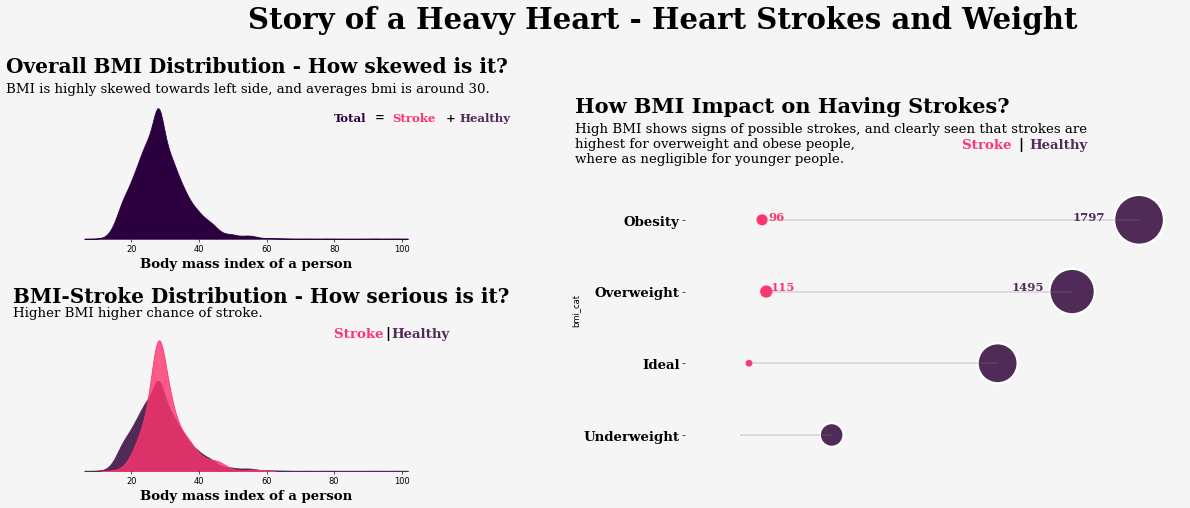

In [1061]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (24,10),dpi = 60)

gs = fig.add_gridspec(10,24)
gs.update(wspace = 1, hspace = 0.05)


ax2 = fig.add_subplot(gs[1:4,0:8]) #distribution plot
ax3 = fig.add_subplot(gs[6:9, 0:8]) #hue distribution plot
ax1 = fig.add_subplot(gs[2:9,13:]) #dumbbell plot

# axes list
axes = [ ax1,ax2, ax3]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f6f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#f6f5f5')
        
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(True)
ax1.set_xlim(xmin = -250,xmax = 2000)
ax1.set_ylim(ymin = -1,ymax =3.5)

# dumbbell plot of stoke and healthy people

stroke_bmi = df[df['stroke'] == 1].bmi_cat.value_counts()
healthy_bmi = df[df['stroke'] == 0].bmi_cat.value_counts()

ax1.hlines(y = ['Obesity', 'Overweight', 'Ideal', 'Underweight'], xmin = [96,115,37,1], 
          xmax = [1797,1495,1159,410], color = 'grey',**{'linewidth':0.5})


sns.scatterplot(y = stroke_bmi.index, x = stroke_bmi.values, s = stroke_bmi.values*2, color = '#fe346e', ax= ax1, alpha = 1)
sns.scatterplot(y = healthy_bmi.index, x = healthy_bmi.values, s = healthy_bmi.values*2, color = '#512b58', ax= ax1, alpha = 1)

ax1.set_yticklabels( labels = ['Obesity', 'Overweight', 'Ideal', 'Underweight'],fontdict = {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})

ax1.text(-750,-1.5, 'How BMI Impact on Having Strokes?' ,{'font': 'Serif', 'size': 25,'weight':'bold', 'color':'black'})
ax1.text(1000,-1., 'Stroke ', {'font': 'Serif','weight':'bold','size': 16,'weight':'bold','style':'normal', 'color':'#fe346e'})
ax1.text(1250,-1, '|', {'color':'black' , 'size':16, 'weight': 'bold'})
ax1.text(1300,-1, 'Healthy', {'font': 'Serif','weight':'bold', 'size': 16,'style':'normal', 'weight':'bold','color':'#512b58'})
ax1.text(-750,-0.8, 'High BMI shows signs of possible strokes, and clearly seen that strokes are \nhighest for overweight and obese people, \nwhere as negligible for younger people.', 
        {'font':'Serif', 'size':'16','color': 'black'})



ax1.text(stroke_bmi.values[0] + 20 , 0.98, stroke_bmi.values[0], {'font':'Serif', 'size':14, 'weight':'bold', 'color':'#fe346e'})
ax1.text(healthy_bmi.values[1] - 275 ,0.98, healthy_bmi.values[1], {'font':'Serif', 'size':14, 'weight':'bold', 'color':'#512b58'})

ax1.text(stroke_bmi.values[1] + 30,0, stroke_bmi.values[1], {'font':'Serif', 'size':14, 'weight':'bold', 'color':'#fe346e'})
ax1.text(healthy_bmi.values[0] - 300,0, healthy_bmi.values[0], {'font':'Serif', 'size':14, 'weight':'bold', 'color':'#512b58'})




# distribution plots ---- only single variable

sns.kdeplot(data = df, x = 'bmi', ax = ax2, shade = True, color = '#2c003e', alpha = 1, )
ax2.set_xlabel('Body mass index of a person', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
ax2.text(-17,0.085,'Overall BMI Distribution - How skewed is it?', {'font':'Serif', 'color': 'black','weight':'bold','size':24})
ax2.text(-17,0.075, 'BMI is highly skewed towards left side, and averages bmi is around 30.', 
        {'font':'Serif', 'size':'16','color': 'black'})
ax2.text(80,0.06, 'Total',{'font':'Serif', 'size':'14','color': '#2c003e','weight':'bold'})
ax2.text(92,0.06, '=',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(97,0.06, 'Stroke',{'font':'Serif', 'size':'14','color': '#fe346e','weight':'bold'})
ax2.text(113,0.06, '+',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(117,0.06, 'Healthy',{'font':'Serif', 'size':'14','color': '#512b58','weight':'bold'})


# distribution plots with hue of strokes


sns.kdeplot(data = df[df['stroke'] == 0], x = 'bmi',ax = ax3, shade = True,  alpha = 1, color = '#512b58' )
sns.kdeplot(data = df[df['stroke'] == 1], x = 'bmi',ax = ax3, shade = True,  alpha = 0.8, color = '#fe346e')

ax3.set_xlabel('Body mass index of a person', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

ax3.text(-15,0.12,'BMI-Stroke Distribution - How serious is it?', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24})
ax3.text(-15,0.11,'Higher BMI higher chance of stroke.', {'font':'Serif', 'color': 'black', 'size':16})
ax3.text(80,0.095, 'Stroke ', {'font': 'Serif','weight':'bold','size': 16,'weight':'bold','style':'normal', 'color':'#fe346e'})
ax3.text(95,0.095, '|', {'color':'black' , 'size':16, 'weight': 'bold'})
ax3.text(97,0.095, 'Healthy', {'font': 'Serif','weight':'bold', 'size': 16,'style':'normal', 'weight':'bold','color':'#512b58'})

fig.text(0.25,0.925,'Story of a Heavy Heart - Heart Strokes and Weight',{'font':'Serif', 'weight':'bold','color': 'black', 'size':35})

fig.show()

##### <a id="3"></a><font color="lightseagreen" size=+1.5><b>Overview of categorical features </b></font>

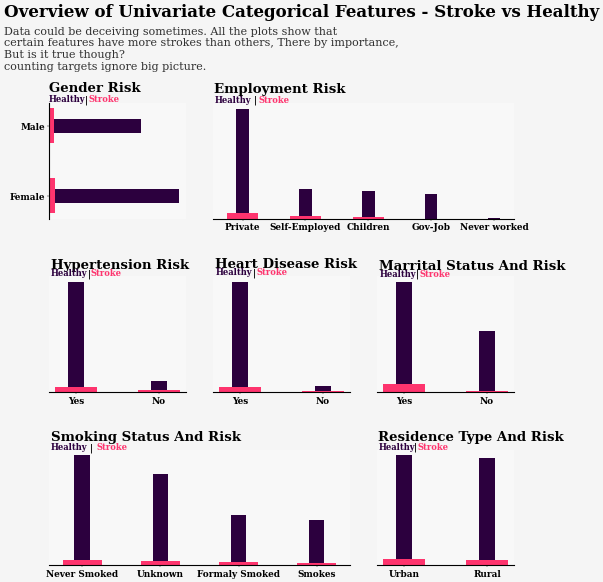

In [1062]:
fig = plt.figure(figsize = (15,15),dpi = 40)

gs = fig.add_gridspec(3,3)
gs.update(wspace = 0.2, hspace = 0.5)


ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1:])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0:2])
ax7 = fig.add_subplot(gs[2,2])

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7]

fig.patch.set_facecolor('#f5f5f5')

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f8f8f8')
    ax.spines['bottom'].set_linewidth(2)
    for loc in ['left', 'right', 'top']:
        ax.spines[loc].set_visible(False)
        ax.spines[loc].set_linewidth(2)


title_args = {'font':'Serif', 'weight':'bold','color': 'black', 'size':24}
font_dict = {'size':16, 'family':'Serif', 'color':'black', 'weight':'bold'}
health_dict = {'font':'Serif', 'color': '#2c003e', 'size':15, 'weight':'bold'}
dash_dict = {'font':'Serif', 'color': 'black', 'size':15,'weight':'bold'}
stroke_dict = {'font':'Serif', 'color': '#fe346e', 'size':15,'weight':'bold'}

stroke_col = '#fe346e'
healthy_col = '#2c003e'

# Ax1: Gender- stroke distributions
healthy_gen = df[df['stroke'] == 0].gender.value_counts()
stroke_gen = df[df['stroke'] == 1].gender.value_counts()

ax1.barh( stroke_gen.index , width = healthy_gen.values[0:2], height = 0.2, color = healthy_col)
ax1.barh( np.arange(len(stroke_gen.index)) , width = stroke_gen.values, height = 0.5, color = stroke_col)
ax1.set_yticklabels(stroke_gen.index, **font_dict)

ax1.axes.get_yaxis().set_visible(True)
ax1.axes.get_xaxis().set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(True)
ax1.text(0,1.5, 'Gender Risk',**title_args)
ax1.text(0,1.35, 'Healthy',**health_dict)
ax1.text(790,1.35, '|',**dash_dict)
ax1.text(870,1.35, 'Stroke',**stroke_dict)

# Ax2: work type - stroke distributions
healthy_gen = df[df['stroke'] == 0].work_type.value_counts()
stroke_gen = df[df['stroke'] == 1].work_type.value_counts()

ax2.bar( healthy_gen.index , height = healthy_gen.values, width = 0.2, color = healthy_col)
ax2.bar( np.arange(len(stroke_gen.index)) , height = stroke_gen.values, width = 0.5, color= stroke_col)
ax2.set_xticklabels(['Private','Self-Employed','Children', 'Gov-Job','Never worked'], **font_dict)


ax2.text(-0.45,3200, 'Employment Risk',**title_args)
ax2.text(-0.45,2950, 'Healthy',**health_dict)
ax2.text(0.18,2950, '|',**dash_dict)
ax2.text(0.25,2950, 'Stroke',**stroke_dict)

# Ax3: hypertension - stroke distributions

healthy_gen = df[df['stroke'] == 0].hypertension.value_counts()
stroke_gen = df[df['stroke'] == 1].hypertension.value_counts()

ax3.bar(['Yes','No'] , height = healthy_gen.values, width = 0.2,color = healthy_col)
ax3.bar( stroke_gen.index, height = stroke_gen.values, width = 0.5,color= stroke_col)
ax3.set_xticklabels(['Yes','No'], **font_dict)

ax3.text(-0.3,5000, 'Hypertension Risk',**title_args)
ax3.text(-0.3,4700, 'Healthy',**health_dict)
ax3.text(0.14,4700, '|',**dash_dict)
ax3.text(0.18,4700, 'Stroke',**stroke_dict)


# Ax4: Heart Disease - stroke distributions

healthy_gen = df[df['stroke'] == 0].heart_disease.value_counts()
stroke_gen = df[df['stroke'] == 1].heart_disease.value_counts()

ax4.bar(['Yes','No'] , height = healthy_gen.values, width = 0.2,color = healthy_col)
ax4.bar( stroke_gen.index, height = stroke_gen.values, width = 0.5,color= stroke_col)
ax4.set_xticklabels(['Yes', 'No'],**font_dict)

ax4.text(-0.3,5250, 'Heart Disease Risk',**title_args)
ax4.text(-0.3,4950, 'Healthy',**health_dict)
ax4.text(0.15,4950, '|',**dash_dict)
ax4.text(0.20,4950, 'Stroke',**stroke_dict)


# Ax5: Married - stroke distributions
healthy_gen = df[df['stroke'] == 0].ever_married.value_counts()
stroke_gen = df[df['stroke'] == 1].ever_married.value_counts()

ax5.bar( healthy_gen.index , height = healthy_gen.values, width = 0.2,color = healthy_col)
ax5.bar( np.arange(len(stroke_gen.index)) , height = stroke_gen.values, width = 0.5,color= stroke_col )
ax5.set_xticklabels(healthy_gen.index, **font_dict)

ax5.text(-0.3,3500, 'Marrital Status And Risk',**title_args)
ax5.text(-0.3,3300, 'Healthy',**health_dict)
ax5.text(0.14,3300, '|',**dash_dict)
ax5.text(0.18,3300, 'Stroke',**stroke_dict)




# Ax6: Smoking status - stroke distributions

healthy_gen = df[df['stroke'] == 0].smoking_status.value_counts()
stroke_gen = df[df['stroke'] == 1].smoking_status.value_counts()

ax6.bar( healthy_gen.index, height = healthy_gen.values, width = 0.2,color = healthy_col)
ax6.bar( np.arange(len(stroke_gen.index)) , height = stroke_gen.values, width = 0.5,color= stroke_col)
ax6.set_xticklabels(['Never Smoked', 'Unknown','Formaly Smoked' ,'Smokes'], **font_dict)

ax6.text(-0.4,2050, 'Smoking Status And Risk',**title_args)
ax6.text(-0.4,1900, 'Healthy',**health_dict)
ax6.text(0.095,1900, '|',**dash_dict)
ax6.text(0.18,1900, 'Stroke',**stroke_dict)




# Ax7: Residence type - stroke distributions

healthy_gen = df[df['stroke'] == 0].Residence_type.value_counts()
stroke_gen = df[df['stroke'] == 1].Residence_type.value_counts()

ax7.bar( healthy_gen.index , height = healthy_gen.values, width = 0.2,color = healthy_col)
ax7.bar( np.arange(len(stroke_gen.index)) , height = stroke_gen.values, width = 0.5,color= stroke_col)
ax7.set_xticklabels(healthy_gen.index, **font_dict)

ax7.text(-0.31,2800, 'Residence Type And Risk',**title_args)
ax7.text(-0.31,2600, 'Healthy',**health_dict)
ax7.text(0.12,2600,'|',**dash_dict)
ax7.text(0.165,2600, 'Stroke',**stroke_dict)

fig.text(0.05,1.025, 'Overview of Univariate Categorical Features - Stroke vs Healthy', {'font':'Serif', 'color':'black','size':30, 'weight':'bold'})
fig.text(0.05,0.9375,'Data could be deceiving sometimes. All the plots show that\ncertain features have more strokes than others, There by importance, \nBut is it true though? \ncounting targets ignore big picture.',{'font':'Serif', 'color':'black','size':20, 'weight':'normal'}, alpha = 0.8)

fig.show()

In [1063]:
from ydata_profiling import ProfileReport

#profile = ProfileReport(df, title="My Report")
#profile.to_notebook_iframe()

#### Target Variable: `stroke`

This plot will show us the distribution of our target variable and reveal if we have a class imbalance problem.

Percentage of each class in the 'stroke' column:
stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64

Observation: The dataset is highly imbalanced, with strokes accounting for less than 5% of all cases.
This justifies our later use of SMOTE to balance the training data.


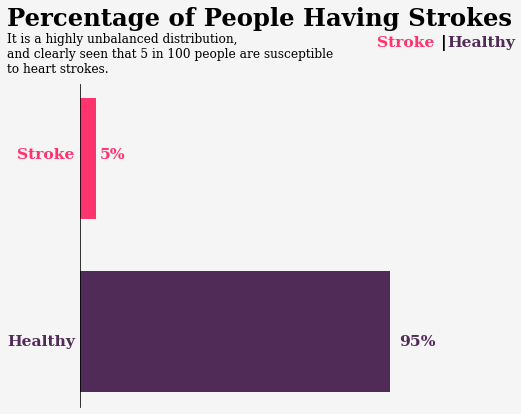

In [1064]:
x = pd.DataFrame( df.groupby(['stroke'])['stroke'].count())

# plot
fig, ax = plt.subplots(figsize = (6,6), dpi = 70)
ax.barh([1], x.stroke[1], height = 0.7, color = '#fe346e')
plt.text(-1150, -0.08, 'Healthy', fontname='Serif', weight='bold', fontsize=16, style='normal', color='#512b58')
plt.text(5000, -0.08, '95%', fontname='Serif', weight='bold', fontsize=16, color='#512b58')
ax.barh([0], x.stroke[0], height=0.7, color='#512b58')
plt.text(-1000, 1, 'Stroke', fontname='Serif', weight='bold', fontsize=16, style='normal', color='#fe346e')
plt.text(300, 1, '5%', fontname='Serif', weight='bold', fontsize=16, color='#fe346e')

fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

plt.text(-1150, 1.77, 'Percentage of People Having Strokes', fontname='Serif', fontsize=25, weight='bold', color='black')
plt.text(4650, 1.65, 'Stroke ', fontname='Serif', weight='bold', fontsize=16, style='normal', color='#fe346e')
plt.text(5650, 1.65, '|', color='black', fontsize=16, weight='bold')
plt.text(5750, 1.65, 'Healthy', fontname='Serif', weight='bold', fontsize=16, style='normal', color='#512b58')
plt.text(-1150, 1.5, 'It is a highly unbalanced distribution,\nand clearly seen that 5 in 100 people are susceptible \nto heart strokes.', 
         fontname='Serif', fontsize=12.5, color='black')

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Calculate and print the exact percentage
stroke_percentage = df['stroke'].value_counts(normalize=True) * 100
print("Percentage of each class in the 'stroke' column:")
print(stroke_percentage)

print("\nObservation: The dataset is highly imbalanced, with strokes accounting for less than 5% of all cases.")
print("This justifies our later use of SMOTE to balance the training data.")

**Observation:** The dataset is **highly imbalanced**. The number of patients who had a stroke (1) is far less than those who did not (0). This is a critical finding and must be addressed before modeling.

In [1065]:
df.drop(columns=['glucose_cat', 'bmi_cat', 'age_cat'], inplace=True)

In [1066]:
from ydata_profiling import ProfileReport

#profile = ProfileReport(df, title="My Report")
#profile.to_notebook_iframe()

## 5. Data Preprocessing



### 5.1. Handle Rare Categorical Values

The gender column has one "Other" value. It's cleanest to remove this single row before proceeding


In [1067]:
print("Original shape of the dataframe:", df.shape)

# Step 1: Drop the 'id' column as it's not a predictive feature
df = df.drop('id', axis=1)

# Step 2: Remove the 'Other' gender category if it exists
if 'Other' in df['gender'].unique():
    df = df[df['gender'] != 'Other']

print("Shape after dropping ID and 'Other' gender:", df.shape)
df.head()

Original shape of the dataframe: (5110, 12)
Shape after dropping ID and 'Other' gender: (5109, 11)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### 5.2. Categorical Feature Encoding

Machine learning models require all input features to be numeric. We will use **One-Hot Encoding** to convert categorical columns into a numerical format. The `id` column is just an identifier and is not useful for prediction, so we will drop it.

In [1068]:

# Use pandas get_dummies to perform one-hot encoding on categorical features
# Convert Marrital Status, Residence and Gender into 0's and 1's
df['gender']=df['gender'].apply(lambda x : 1 if x=='Male' else 0) 
df["Residence_type"] = df["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)
df["ever_married"] = df["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)
# used One Hot encoding smoking_status, work_type

data_dummies = df[['smoking_status','work_type']]
data_dummies=pd.get_dummies(data_dummies ,dtype=int)
data_dummies.astype('int64')
df.drop(columns=['smoking_status','work_type'],inplace=True)

y=df['stroke']
df.drop(columns=['stroke'],inplace=True)
x=df.merge(data_dummies,left_index=True, right_index=True,how='left')
df_processed=x.merge(y,left_index=True, right_index=True,how='left')
sc = StandardScaler()
#df_processed = pd.DataFrame(sc.fit_transform(df_processed), columns=df_processed.columns)
#print("\nShape of the dataframe after one-hot encoding:", df_processed.shape)
print("\nFirst 5 rows of the processed dataframe:")
df_processed.head()


First 5 rows of the processed dataframe:


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,stroke
0,1,67.0,0,1,1,1,228.69,36.6,0,1,0,0,0,0,1,0,0,1
1,0,61.0,0,0,1,0,202.21,28.1,0,0,1,0,0,0,0,1,0,1
2,1,80.0,0,1,1,0,105.92,32.5,0,0,1,0,0,0,1,0,0,1
3,0,49.0,0,0,1,1,171.23,34.4,0,0,0,1,0,0,1,0,0,1
4,0,79.0,1,0,1,0,174.12,24.0,0,0,1,0,0,0,0,1,0,1


### 5.3. Separating Features (X) and Target (y)

In [1069]:
# 5.2. Define Features (X) and Target (y)

X = df_processed.drop('stroke', axis=1)
y = df_processed['stroke']

print("Shape of our features (X):", X.shape)
print("Shape of our target (y):", y.shape)

Shape of our features (X): (5109, 17)
Shape of our target (y): (5109,)


### 5.3. Train-Test Split

We split the data into a training set (to build the model) and a testing set (to evaluate the model on unseen data).

In [1070]:
# 5.3. Split Data into Training and Testing Sets

# Import the function from scikit-learn
from sklearn.model_selection import train_test_split

# Split the data, with 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,    # 20% of data will be for testing
    random_state=42,  # Ensures the split is the same every time we run
    stratify=y        # ESSENTIAL: Keeps the stroke proportion the same in train and test
)

print("--- Data Split ---")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("\nProportion of stroke cases in original data:   ", y.value_counts(normalize=True)[1])
print("Proportion of stroke cases in training data: ", y_train.value_counts(normalize=True)[1])
print("Proportion of stroke cases in testing data:  ", y_test.value_counts(normalize=True)[1])

--- Data Split ---
X_train shape: (4087, 17)
X_test shape: (1022, 17)

Proportion of stroke cases in original data:    0.04873752201996477
Proportion of stroke cases in training data:  0.04869097137264497
Proportion of stroke cases in testing data:   0.04892367906066536


### 5.4. Handling Class Imbalance with SMOTE

To solve the imbalance problem, we will use the **Synthetic Minority Over-sampling Technique (SMOTE)**. SMOTE creates new, synthetic data points for the minority class (stroke cases).

**Crucial Note:** We only apply SMOTE to the **training data**. We want to evaluate our model on the original, real-world distribution of the test data.

In [1071]:
# 5.4. Handling Class Imbalance using SMOTE


print("--- Handling Class Imbalance ---")
print("Value counts before SMOTE:\n", y_train.value_counts())

# Initialize the SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data ONLY
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\nValue counts after SMOTE:\n", y_train_smote.value_counts())
print("\nObservation: The training data is now perfectly balanced.")

--- Handling Class Imbalance ---
Value counts before SMOTE:
 stroke
0    3888
1     199
Name: count, dtype: int64

Value counts after SMOTE:
 stroke
0    3888
1    3888
Name: count, dtype: int64

Observation: The training data is now perfectly balanced.


## 6. Model Training and Evaluation

We have now reached the final phase of our project. Our data is preprocessed, split, and the training set is balanced using SMOTE. We are ready to train our machine learning models.
Our Process:
For each model, we will:
1. Initialize the model.
2. Train it using our balanced training data (X_train_smote, y_train_smote).
3. Test its performance on the original, unbalanced test data (X_test, y_test), as this represents the real-world scenario.
4. Evaluate it using our chosen metrics: F1-Score, Recall, Precision, and ROC-AUC Score.

To easily compare all models at the end, we will store the results of each one in a dictionary.

In [1072]:
# Create a dictionary to store the results of each model
results = {}

### 6.1. Model 1: Logistic Regression (Baseline)

Logistic Regression is a linear model that is an excellent starting point for any classification task. It estimates probabilities and is very efficient, making it the perfect baseline to compare against more complex models.

--- Logistic Regression Classification Report ---
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       972
           1       0.32      0.42      0.36        50

    accuracy                           0.93      1022
   macro avg       0.64      0.69      0.66      1022
weighted avg       0.94      0.93      0.93      1022

--- Logistic Regression Confusion Matrix ---


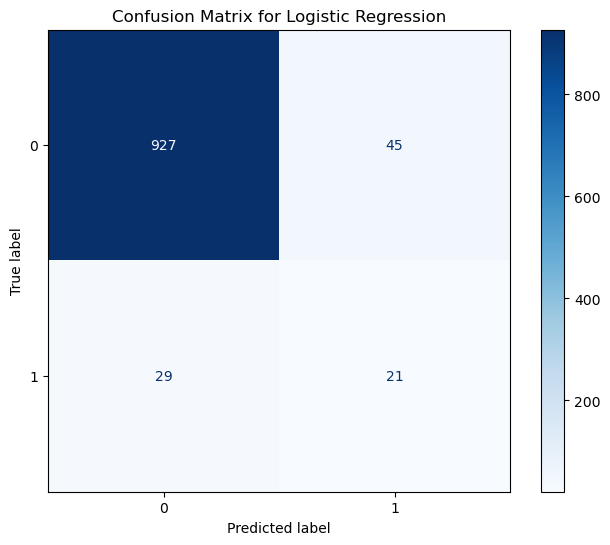


F1-Score: 0.3621
Precision: 0.3182
Recall: 0.4200
ROC-AUC Score: 0.8224


In [1073]:
from sklearn.metrics import ConfusionMatrixDisplay

# Initialize the Logistic Regression model
# We set max_iter=1000 to ensure the model has enough iterations to converge, preventing a common warning.
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_smote, y_train_smote)

# Make predictions on the original, unbalanced test set
y_pred_log_reg = log_reg.predict(X_test)

# Predict probabilities, which are needed for the ROC-AUC score
y_pred_proba_log_reg = log_reg.predict_proba(X_test)[:, 1] # We only need the probabilities for the 'positive' class (stroke=1)

# Print the Classification Report
# This report gives a great summary of precision, recall, and f1-score.
print("--- Logistic Regression Classification Report ---")
print(classification_report(y_test, y_pred_log_reg))

# Display the Confusion Matrix
print("--- Logistic Regression Confusion Matrix ---")
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(
    log_reg,
    X_test,
    y_test,
    ax=ax,
    cmap='Blues',
    values_format='d' # 'd' formats the numbers as integers
)
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

# --- Store the results for our final comparison table ---
results['Logistic Regression'] = {
    'F1-Score': f1_score(y_test, y_pred_log_reg),
    'Precision': precision_score(y_test, y_pred_log_reg),
    'Recall': recall_score(y_test, y_pred_log_reg),
    'ROC-AUC': roc_auc_score(y_test, y_pred_proba_log_reg)
}

print(f"\nF1-Score: {results['Logistic Regression']['F1-Score']:.4f}")
print(f"Precision: {results['Logistic Regression']['Precision']:.4f}")
print(f"Recall: {results['Logistic Regression']['Recall']:.4f}")
print(f"ROC-AUC Score: {results['Logistic Regression']['ROC-AUC']:.4f}")

### 6.2. Model 2: K-Nearest Neighbors (KNN)

Now, follow the same 4 steps as above for the KNN model.

--- KNeighbors Classification Report ---
              precision    recall  f1-score   support

           0       0.97      0.83      0.89       972
           1       0.13      0.52      0.21        50

    accuracy                           0.81      1022
   macro avg       0.55      0.67      0.55      1022
weighted avg       0.93      0.81      0.86      1022


--- KNeighbors Confusion Matrix ---


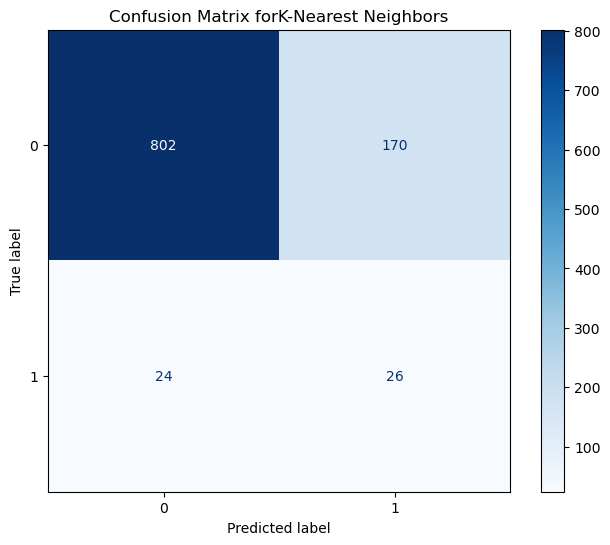


F1-Score: 0.2114
Precision: 0.1327
Recall: 0.5200
ROC-AUC Score: 0.7195


In [1075]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train_smote, y_train_smote)
# Make predictions on the original, unbalanced test set
y_pred_knn = knn.predict(X_test)

# Predict probabilities for the ROC-AUC score
y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]

# Print the Classification Report
print("--- KNeighbors Classification Report ---")
print(classification_report(y_test, y_pred_knn))

# Display the Confusion Matrix
print("\n--- KNeighbors Confusion Matrix ---")
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(
    knn,
    X_test,
    y_test,
    ax=ax,
    cmap='Blues',
    values_format='d'
)
plt.title("Confusion Matrix forK-Nearest Neighbors")
plt.show()

# --- Store the results for our final comparison table ---
results['K-Nearest Neighbors'] = {
    'F1-Score': f1_score(y_test, y_pred_knn),
    'Precision': precision_score(y_test, y_pred_knn),
    'Recall': recall_score(y_test, y_pred_knn),
    'ROC-AUC': roc_auc_score(y_test, y_pred_proba_knn)
}

print(f"\nF1-Score: {results['K-Nearest Neighbors']['F1-Score']:.4f}")
print(f"Precision: {results['K-Nearest Neighbors']['Precision']:.4f}")
print(f"Recall: {results['K-Nearest Neighbors']['Recall']:.4f}")
print(f"ROC-AUC Score: {results['K-Nearest Neighbors']['ROC-AUC']:.4f}")


Fitting 5 folds for each of 4 candidates, totalling 20 fits
logreg best CV F1@stroke=1 = 0.8677 with params {'C': 0.1}
Fitting 5 folds for each of 9 candidates, totalling 45 fits
rf best CV F1@stroke=1 = 0.9842 with params {'max_depth': None, 'min_samples_leaf': 1}
Fitting 5 folds for each of 32 candidates, totalling 160 fits
knn best CV F1@stroke=1 = 0.9870 with params {'metric': 'minkowski', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

=== Test Set Results (sorted by F1@1) ===
    model  Accuracy  Precision@1  Recall@1      F1@1   ROC-AUC
1      rf  0.860078     0.150376      0.40  0.218579  0.785895
0  logreg  0.715264     0.124611      0.80  0.215633  0.838498
2     knn  0.816047     0.116667      0.42  0.182609  0.665247


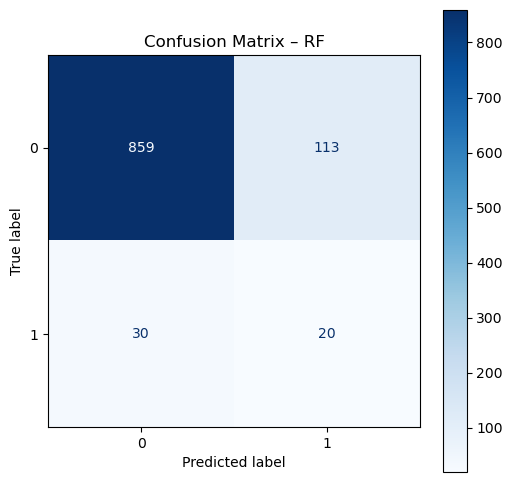


--- Threshold Tuning for RF (F1, Precision, Recall) ---
Thresh=0.1 → F1=0.183, Precision=0.103, Recall=0.840
Thresh=0.2 → F1=0.214, Precision=0.123, Recall=0.800
Thresh=0.3 → F1=0.218, Precision=0.132, Recall=0.640
Thresh=0.4 → F1=0.203, Precision=0.129, Recall=0.480
Thresh=0.5 → F1=0.215, Precision=0.147, Recall=0.400
Thresh=0.6 → F1=0.187, Precision=0.146, Recall=0.260
Thresh=0.7 → F1=0.162, Precision=0.163, Recall=0.160
Thresh=0.8 → F1=0.152, Precision=0.207, Recall=0.120
Thresh=0.9 → F1=0.095, Precision=0.231, Recall=0.060

--- Stacked Model Metrics on TEST Set ---
F1@1: 0.15469613259668508
ROC-AUC: 0.7474074074074074


In [1082]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    make_scorer,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier

from imblearn.combine import SMOTEENN

# --- 0) Assume you already have your DataFrame df and target 'stroke' split: ---
# X_train, X_test, y_train, y_test = train_test_split(...)

# --- 1) Preprocessing pipeline ---
numeric_features = X_train.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object','category']).columns.tolist()

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])
feature_selector = SelectKBest(f_classif, k=20)

full_preprocess = Pipeline([
    ('pre', preprocessor),
    ('select', feature_selector)
])

# --- 2) Fit‐transform WITH y and then resample the training data with SMOTEENN ---
X_pre = full_preprocess.fit_transform(X_train, y_train)
smoteenn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smoteenn.fit_resample(X_pre, y_train)

# --- 3) Define three model pipelines (they get X_resampled already preprocessed) ---
models = {
    'logreg': LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    'rf':    RandomForestClassifier(class_weight='balanced', n_estimators=200, random_state=42),
    'knn':   KNeighborsClassifier()
}

param_grids = {
    'logreg': {
        'C': [0.01, 0.1, 1, 10]
    },
    'rf': {
        'max_depth': [None, 10, 20],
        'min_samples_leaf': [1, 2, 4]
    },
    'knn': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['minkowski', 'manhattan'],
        'p': [1, 2]
    }
}

# --- 4) Grid search optimizing F1 for stroke=1 ---
f1_stroke = make_scorer(f1_score, pos_label=1)
best_estimators = {}

for name, clf in models.items():
    grid = GridSearchCV(
        estimator=clf,
        param_grid=param_grids[name],
        scoring=f1_stroke,
        cv=5,
        n_jobs=-1,
        verbose=1,
        refit=True
    )
    grid.fit(X_resampled, y_resampled)
    best_estimators[name] = grid.best_estimator_
    print(f"{name} best CV F1@stroke=1 = {grid.best_score_:.4f} with params {grid.best_params_}")

# --- 5) Evaluate each on the hold‑out test set (apply preprocessing first) ---
results = []
X_test_pre = full_preprocess.transform(X_test)

for name, est in best_estimators.items():
    y_pred = est.predict(X_test_pre)
    y_proba = est.predict_proba(X_test_pre)[:,1]
    prec = precision_score(y_test, y_pred, pos_label=1)
    rec  = recall_score(y_test, y_pred, pos_label=1)
    f1   = f1_score(y_test, y_pred, pos_label=1)
    auc  = roc_auc_score(y_test, y_proba)
    acc  = accuracy_score(y_test, y_pred)
    results.append({
        'model': name,
        'Accuracy': acc,
        'Precision@1': prec,
        'Recall@1': rec,
        'F1@1': f1,
        'ROC-AUC': auc
    })

df_results = pd.DataFrame(results).sort_values('F1@1', ascending=False)
print("\n=== Test Set Results (sorted by F1@1) ===")
print(df_results)

# --- 6) Plot confusion matrix & threshold tuning for best model ---
best_name = df_results.iloc[0]['model']
best_model = best_estimators[best_name]
y_proba_best = best_model.predict_proba(X_test_pre)[:,1]

# Confusion matrix at default threshold 0.5
cm = confusion_matrix(y_test, best_model.predict(X_test_pre))
fig, ax = plt.subplots(figsize=(6,6))
ConfusionMatrixDisplay(cm, display_labels=best_model.classes_).plot(ax=ax, cmap='Blues', values_format='d')
plt.title(f"Confusion Matrix – {best_name.upper()}")
plt.show()

# Threshold tuning loop
print(f"\n--- Threshold Tuning for {best_name.upper()} (F1, Precision, Recall) ---")
for t in np.linspace(0.1, 0.9, 9):
    preds_t = (y_proba_best >= t).astype(int)
    print(f"Thresh={t:.1f} → F1={f1_score(y_test,preds_t):.3f}, Precision={precision_score(y_test,preds_t):.3f}, Recall={recall_score(y_test,preds_t):.3f}")

# --- 7) Optional stacking ensemble of top 3 ---
stack = StackingClassifier(
    estimators=[(n, best_estimators[n]) for n in models.keys()],
    final_estimator=LogisticRegression(class_weight='balanced', max_iter=1000),
    cv=5,
    n_jobs=-1
)
stack.fit(X_resampled, y_resampled)
y_pred_stack = stack.predict(X_test_pre)
y_proba_stack = stack.predict_proba(X_test_pre)[:,1]
print("\n--- Stacked Model Metrics on TEST Set ---")
print("F1@1:", f1_score(y_test, y_pred_stack, pos_label=1))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_stack))


### 6.3. Model 3: Decision Tree
The Decision Tree is a non-linear model that works by splitting the data into branches based on feature values, creating a tree-like flow of decisions. It's highly interpretable and often forms the basis for more powerful ensemble models like Random Forest.

--- Decision Tree Classification Report ---
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       972
           1       0.15      0.22      0.18        50

    accuracy                           0.90      1022
   macro avg       0.55      0.58      0.56      1022
weighted avg       0.92      0.90      0.91      1022


--- Decision Tree Confusion Matrix ---


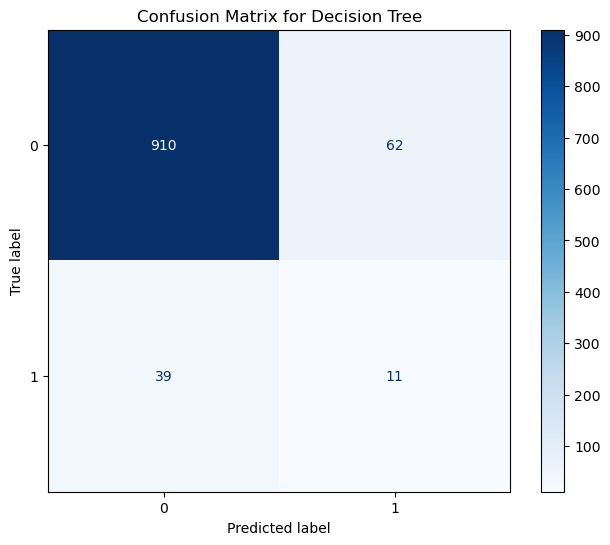


F1-Score: 0.1789
Precision: 0.1507
Recall: 0.2200
ROC-AUC Score: 0.5781


In [ ]:
# Initialize the Decision Tree Classifier
# We set a random_state to ensure the results are the same every time we run the code.
dt = DecisionTreeClassifier(random_state=42)
# Train the model on the balanced (SMOTE) training data
dt.fit(X_train_smote, y_train_smote)

# Make predictions on the original, unbalanced test set
y_pred_dt = dt.predict(X_test)

# Predict probabilities for the ROC-AUC score
y_pred_proba_dt = dt.predict_proba(X_test)[:, 1]

# Print the Classification Report
print("--- Decision Tree Classification Report ---")
print(classification_report(y_test, y_pred_dt))

# Display the Confusion Matrix
print("\n--- Decision Tree Confusion Matrix ---")
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(
    dt,
    X_test,
    y_test,
    ax=ax,
    cmap='Blues',
    values_format='d'
)
plt.title("Confusion Matrix for Decision Tree")
plt.show()

# --- Store the results for our final comparison table ---
results['Decision Tree'] = {
    'F1-Score': f1_score(y_test, y_pred_dt),
    'Precision': precision_score(y_test, y_pred_dt),
    'Recall': recall_score(y_test, y_pred_dt),
    'ROC-AUC': roc_auc_score(y_test, y_pred_proba_dt)
}

print(f"\nF1-Score: {results['Decision Tree']['F1-Score']:.4f}")
print(f"Precision: {results['Decision Tree']['Precision']:.4f}")
print(f"Recall: {results['Decision Tree']['Recall']:.4f}")
print(f"ROC-AUC Score: {results['Decision Tree']['ROC-AUC']:.4f}")


OVERFITT

### 6.4. Model 4: Random Forest (Ensemble)

This is our first ensemble model.

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       972
           1       0.11      0.04      0.06        50

    accuracy                           0.94      1022
   macro avg       0.53      0.51      0.51      1022
weighted avg       0.91      0.94      0.92      1022


--- Decision Tree Confusion Matrix ---


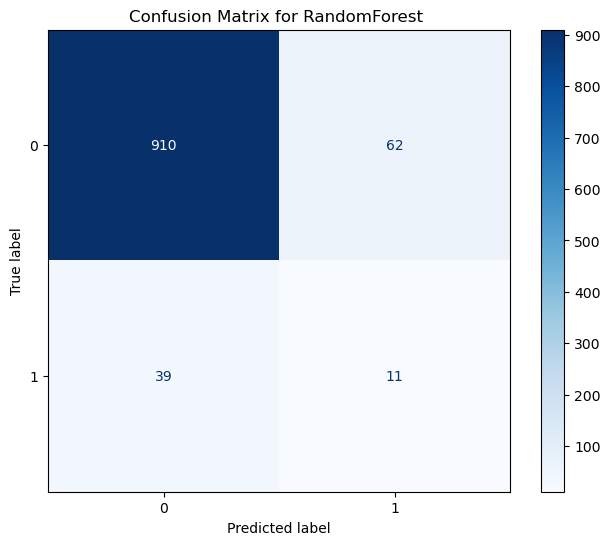


F1-Score: 0.1789
Precision: 0.1507
Recall: 0.2200
ROC-AUC Score: 0.7648


In [ ]:
# 1. Initialize and train the model
# random_state ensures the results are reproducible.
forest = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
forest.fit(X_train_smote, y_train_smote)

# 2. Make predictions on the test set
y_pred_rf = forest.predict(X_test)

# Predict probabilities for the ROC-AUC score
y_pred_proba_dt = forest.predict_proba(X_test)[:, 1]

# 3. Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))



# Display the Confusion Matrix
print("\n--- Decision Tree Confusion Matrix ---")
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(
    dt,
    X_test,
    y_test,
    ax=ax,
    cmap='Blues',
    values_format='d'
)
plt.title("Confusion Matrix for RandomForest ")
plt.show()

# --- Store the results for our final comparison table ---
results['RandomForest'] = {
    'F1-Score': f1_score(y_test, y_pred_dt),
    'Precision': precision_score(y_test, y_pred_dt),
    'Recall': recall_score(y_test, y_pred_dt),
    'ROC-AUC': roc_auc_score(y_test, y_pred_proba_dt)
}

print(f"\nF1-Score: {results['RandomForest']['F1-Score']:.4f}")
print(f"Precision: {results['RandomForest']['Precision']:.4f}")
print(f"Recall: {results['RandomForest']['Recall']:.4f}")
print(f"ROC-AUC Score: {results['RandomForest']['ROC-AUC']:.4f}")

### 6.5. Model 5: Gradient Boosting (Ensemble)

This is another powerful ensemble model.

In [ ]:
# 1. Initialize and train the model
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_smote, y_train_smote)

# 2. Make predictions on the test set
y_pred_gb = gb.predict(X_test)

# 3. Evaluate the model
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

# 4. Store results for our final comparison
results['Gradient Boosting'] = {
    'F1-Score': f1_score(y_test, y_pred_gb),
    'Precision': precision_score(y_test, y_pred_gb),
    'Recall': recall_score(y_test, y_pred_gb),
    'ROC-AUC': roc_auc_score(y_test, y_pred_gb)
}


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       972
           1       0.20      0.16      0.18        50

    accuracy                           0.93      1022
   macro avg       0.58      0.56      0.57      1022
weighted avg       0.92      0.93      0.92      1022



### 6.6. Tuning models

In [ ]:
grid_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[0]}]), 
               (KNeighborsClassifier(),[{'n_neighbors':[5,7,8,10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]), 
               #(SVC(),[{'C':[0.25,0.5,0.75,1],'kernel':['linear', 'rbf'],'random_state':[0]}]), 
               #(GaussianNB(),[{'var_smoothing': [1e-09]}]), 
               #(BernoulliNB(), [{'alpha': [0.25, 0.5, 1]}]), 
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}])]
              #(XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error']}])]

## 7. Model Comparison

Finally, we will compile the results from all models into a single DataFrame and visualize them to easily compare their performance.

In [ ]:
# Convert the results dictionary to a pandas DataFrame
results_df = pd.DataFrame(results).T # .T transposes the DataFrame for better readability

print("Model Performance Comparison:")
results_df

Model Performance Comparison:


,F1-Score,Precision,Recall,ROC-AUC
Logistic Regression,0.362069,0.318182,0.42,0.822449
Decision Tree,0.178862,0.150685,0.22,0.578107
Random Forest,0.085714,0.150000,0.06,0.521255
Gradient Boosting,0.175824,0.195122,0.16,0.563025


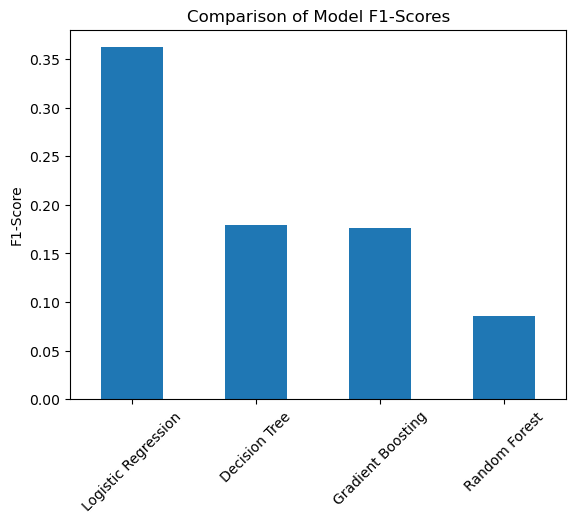

In [ ]:
# Visualize the comparison, focusing on F1-Score
results_df['F1-Score'].sort_values(ascending=False).plot(kind='bar')
plt.title('Comparison of Model F1-Scores')
plt.ylabel('F1-Score')
plt.xticks(rotation=45)
plt.show()

## 8. Conclusion

In this section, you will write your final report based on the results.

*   **Summary of Work:** Briefly restate the project's objective and the steps you took (EDA, preprocessing with SMOTE, model training).
*   **Best Model:** Identify which model performed the best. Justify your choice by referring to the evaluation metrics (e.g., "The Random Forest model was chosen as the best-performing model due to its highest F1-Score of [value] and ROC-AUC score of [value], indicating a strong balance between precision and recall.").
*   **Insights:** Discuss the results. Did the ensemble models (Random Forest, Gradient Boosting) perform better than the basic models (Logistic Regression, KNN)? Why do you think that is? (Hint: Ensembles combine multiple models to reduce errors and improve generalization).
*   **Limitations & Future Work:** Mention any limitations (e.g., the dataset size is still relatively small) and suggest what could be done next (e.g., collecting more data, trying more advanced models like XGBoost, or performing hyperparameter tuning to optimize the best model).